In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_bike= pd.read_csv("BIKE DETAILS.csv")

In [5]:
df_bike.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [8]:
df_bike.shape

(1061, 7)

In [10]:
range=np.max(df_bike['selling_price']) - np.min(df_bike['selling_price'])
print(range)

755000


Ans1. Range of selling price is 757000

In [11]:
median_selling_price = np.median (df_bike['selling_price'])
print(median_selling_price)

45000.0


Ans2. median selling price for bike is 45000.0

In [12]:
df_bike.seller_type.value_counts(normalize=True)

seller_type
Individual    0.994345
Dealer        0.005655
Name: proportion, dtype: float64

Ans3. Indivisual is the most common seller type. 

In [16]:
print(len(df_bike[df_bike.km_driven>=50000]))

207


Ans4. 207 bikes have driven more than 50,000 kilometers

In [18]:
df_bike.groupby('owner').km_driven.mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

Ans5.  1st owner     32816.583333
       2nd owner     39288.991870
       3rd owner     33292.181818
       4th owner    311500.000000

In [21]:
round(len(df_bike[df_bike['year']<=2015])/len(df_bike)*100,2)

56.64

Ans6. 56.64% of bikes are from the year 2015 or older.

In [29]:
df_bike[df_bike.ex_showroom_price.isnull()==True].seller_type.value_counts(normalize=True)

seller_type
Individual    0.993103
Dealer        0.006897
Name: proportion, dtype: float64

Ans7. 99.31% of missing values across the dataset is from indivisual type sellers. 

In [30]:
df_bike[df_bike.ex_showroom_price==np.max(df_bike.ex_showroom_price)]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


Ans8. Heighest ex_showroom_price is 1278000 for Harley-Davidson Street Bob. 

In [31]:
df_bike.seller_type.value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

Ans.9 Individual    1055
      Dealer           6

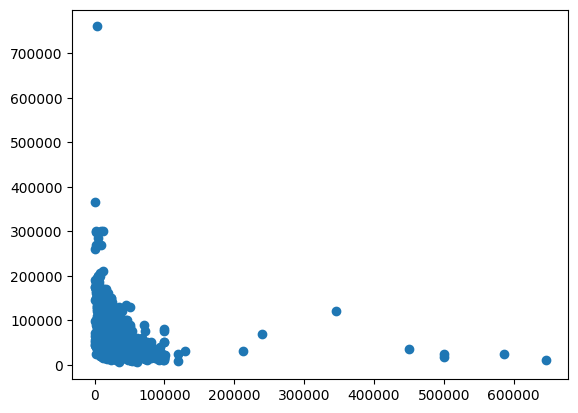

In [33]:
plt.scatter(y=df_bike[df_bike.owner== '1st owner'].selling_price, x=df_bike[df_bike.owner== '1st owner'].km_driven)

Ans 10. selling price is decreasing as km driven is incresing 
        Heighest selling price is for less then 10000

In [37]:
perc_25= np.percentile(df_bike['km_driven'], 25)
perc_75= np.percentile(df_bike['km_driven'], 75)
IQR= perc_75-perc_25
Upper_cap=IQR*1.5

In [38]:
df_bike[df_bike['km_driven']>Upper_cap]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
17,Yamaha YZF R15 S,40000,2010,Individual,2nd owner,45000,117926.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
...,...,...,...,...,...,...,...
1052,Hero Hunk,20000,2009,Individual,2nd owner,49000,75000.0
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [47]:
df_bike.drop(df_bike[df_bike.km_driven>Upper_cap].index, axis=0, inplace=True)

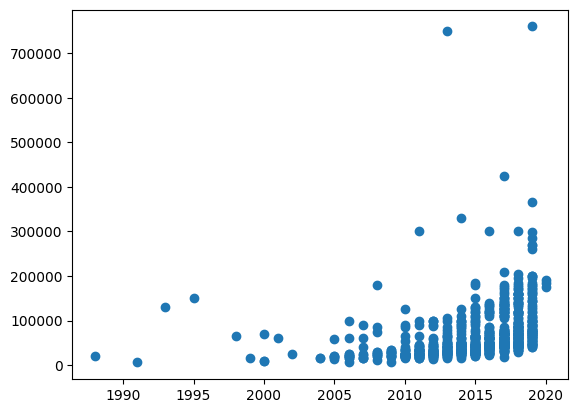

In [54]:

plt.scatter(df_bike.year, df_bike.selling_price)
plt.show()

Ans. Selling price is higher for new bikes 
     most of the bikes are after 2005 or onwards

In [57]:
Avg_Dep_Value= (df_bike['ex_showroom_price'] - df_bike['selling_price'])/(2024-df_bike.year)
print(Avg_Dep_Value.mean())

2961.917266340994


Ans13. Average depreciation in selling price based on the bike's age is 2961.91

In [65]:
# Group the data by year and calculate the mean selling price for each year
yearly_mean = df_bike.groupby('year')['selling_price'].transform('mean')

# Filter rows where selling_price is greater than the mean for that year
filtered_df = df_bike[df_bike['selling_price'] > yearly_mean]

# Extract the 'name' column from the filtered DataFrame
result = filtered_df[['year', 'name']]
print(result)


      year                                  name
0     2019             Royal Enfield Classic 350
2     2018   Royal Enfield Classic Gunmetal Grey
3     2015     Yamaha Fazer FI V 2.0 [2016-2018]
7     2008  Royal Enfield Bullet 350 [2007-2011]
13    2019                         Yamaha YZF R3
...    ...                                   ...
996   2016                         Honda CBR 150
997   2015                          Hero Extreme
1000  2015                         Honda CBR 150
1005  2014                    TVS Apache RTR 160
1023  2012                Bajaj Avenger 220 dtsi

[241 rows x 2 columns]


In [ ]:
corr=df_bike[['year', 'selling_price', 'km_driven', 'ex_showroom_price']].isnull().sum()
sns.heatmap(corr, annot=True, fmt=".2f")
